===== LogisticRegression =====
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC AUC: 0.9420995670995671
===== DecisionTree =====
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC: 0.8187229437229436
===== RandomForest =====
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84  

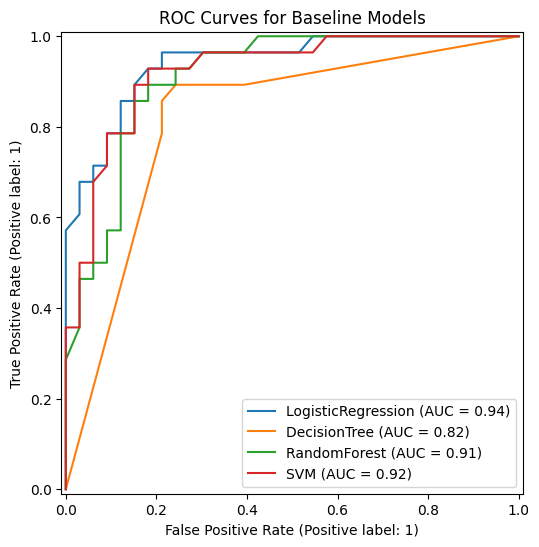

Training & evaluation finished. Models and results saved.


In [2]:
# ===== Imports =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ===== Load data =====
df = pd.read_csv("data/heart_disease_selected.csv")

# تحويل target إلى binary (0 = لا يوجد مرض، 1 = يوجد مرض)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

X = df.drop("target", axis=1)
y = df["target"]

# ===== Split data =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== Define models =====
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver="liblinear", random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# ===== Train & Evaluate =====
results = {}

os.makedirs("models", exist_ok=True)
os.makedirs("results", exist_ok=True)

for name, model in models.items():
    print(f"===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print("ROC AUC:", auc)
        results[name] = auc
    
    # Save model
    joblib.dump(model, f"models/{name}_baseline.pkl")

# ===== Plot ROC Curves =====
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.title("ROC Curves for Baseline Models")
plt.show()

# ===== Save results =====
with open("results/evaluation_metrics.txt", "w") as f:
    for name, auc in results.items():
        f.write(f"{name}: ROC AUC = {auc:.4f}\n")

print("Training & evaluation finished. Models and results saved.")
